In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from concat_aseg_dkt import concat_aseg_dkt
from visualization_hcp_ya import map_yeo

In [4]:
# loading in dfs
no_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_asegYeo_noConfounds/HCP_YA_asegYeo_noConfounds.csv",
                          "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_dktYeo_noConfounds/HCP_YA_dktYeo_noConfounds.csv")

all_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_asegYeo_allConfounds/HCP_YA_asegYeo_allConfounds.csv",
                           "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_dktYeo_allConfounds/HCP_YA_dktYeo_allConfounds.csv")

age_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_asegYeo_ageConfound/HCP_YA_asegYeo_ageConfound.csv",
                           "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_dktYeo_ageConfound/HCP_YA_dktYeo_ageConfound.csv")

hm_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_asegYeo_hmConfound/HCP_YA_asegYeo_hmConfound.csv",
                          "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_dktYeo_hmConfound/HCP_YA_dktYeo_hmConfound.csv")

intraCranial_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_asegYeo_intraCranialVolConfound/HCP_YA_asegYeo_intraCranialVolConfound.csv",
                                    "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_dktYeo_intraCranialVolConfound/HCP_YA_dktYeo_intraCranialVolConfound.csv")

sex_conf = concat_aseg_dkt("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_asegYeo_sexConfound/HCP_YA_asegYeo_sexConfound.csv",
                           "/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/regression_outputs/HCP_YA_dktYeo_sexConfound/HCP_YA_dktYeo_sexConfound.csv")

# load dictionary 
dictionary = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/structural_dictionary.csv") # originally from "/scratch/l.lexi/WAPIAW2024/Source_Code/maps/structural_dictionary.csv" 


In [5]:
# function that overlaps a df with confound-regressed betas with no-confound regressed betas
def overlapped_hist(df_conf, df_name, phenotype=None, title=False, overlap=True, color="#f46d43"): 
    df = map_yeo(no_conf, dictionary)
    df = df[(df['regressor'] == 'IDP (feature)')]
    
    df_conf = map_yeo(df_conf, dictionary)
    df_conf = df_conf[(df_conf['regressor'] == 'IDP (feature)')]
    
    groups = df["Yeo_name"].unique()
    
    if phenotype != None:
        df = df[(df['phenotype'] == phenotype)]
        df_conf = df_conf[(df_conf['phenotype'] == phenotype)]
        

    num_bins = 15
    bins = np.linspace(-0.2, 0.2, num_bins + 1)
    
    # Create a figure and axis for each group
    fig, axes = plt.subplots(nrows=1, ncols=len(groups), figsize=(8 * len(groups), 10))


    # Plot histograms for each group
    for ax, group in zip(axes, groups):
        df_group_data = df[df['Yeo_name'] == group]['coef_']
        df_conf_group_data = df_conf[df_conf['Yeo_name'] == group]['coef_']
        
        if overlap:
            ax.hist(df_group_data, bins=bins, alpha=0.50, color = "#4575b4")
        
        ax.hist(df_conf_group_data, bins=bins, alpha=0.5, color=color)

        if title:
            ax.set_title(f'{group}', fontsize=55, fontweight='bold')
            
        if group == "Visual":
            ax.set_ylabel(df_name, fontsize=55, fontweight='bold')
            
        ax.set_xlabel('Coefficient')
        ax.set_xlim(-0.20, 0.2)
        ax.set_ylim(0, 40)

    plt.tight_layout()
    plt.show()

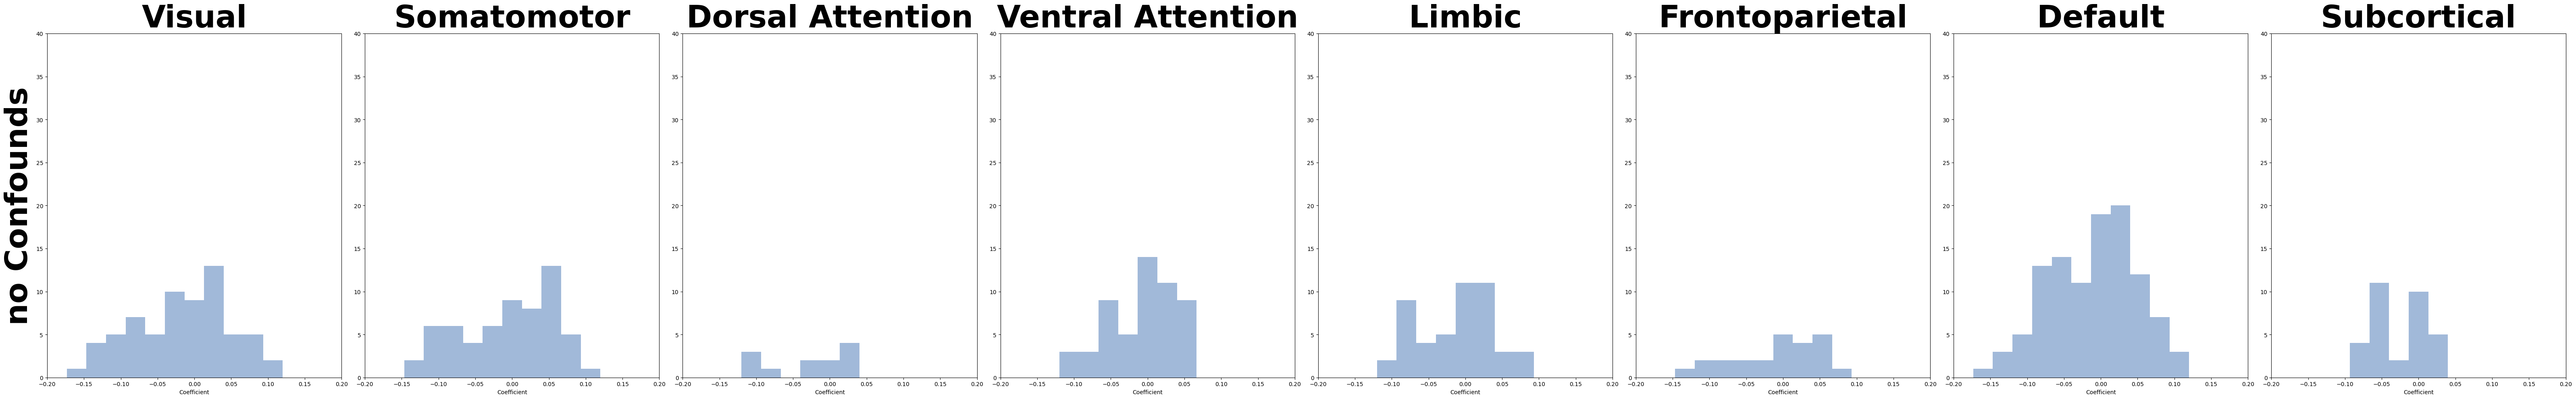

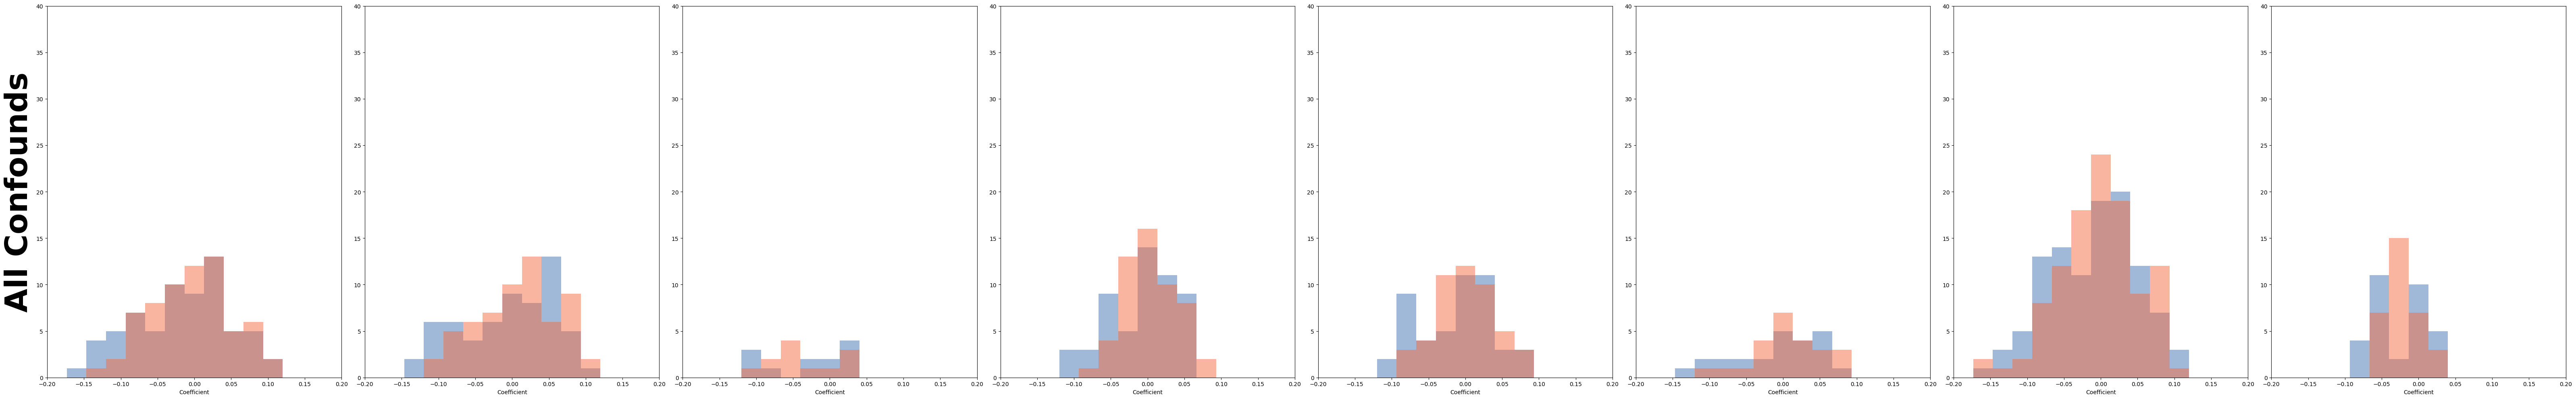

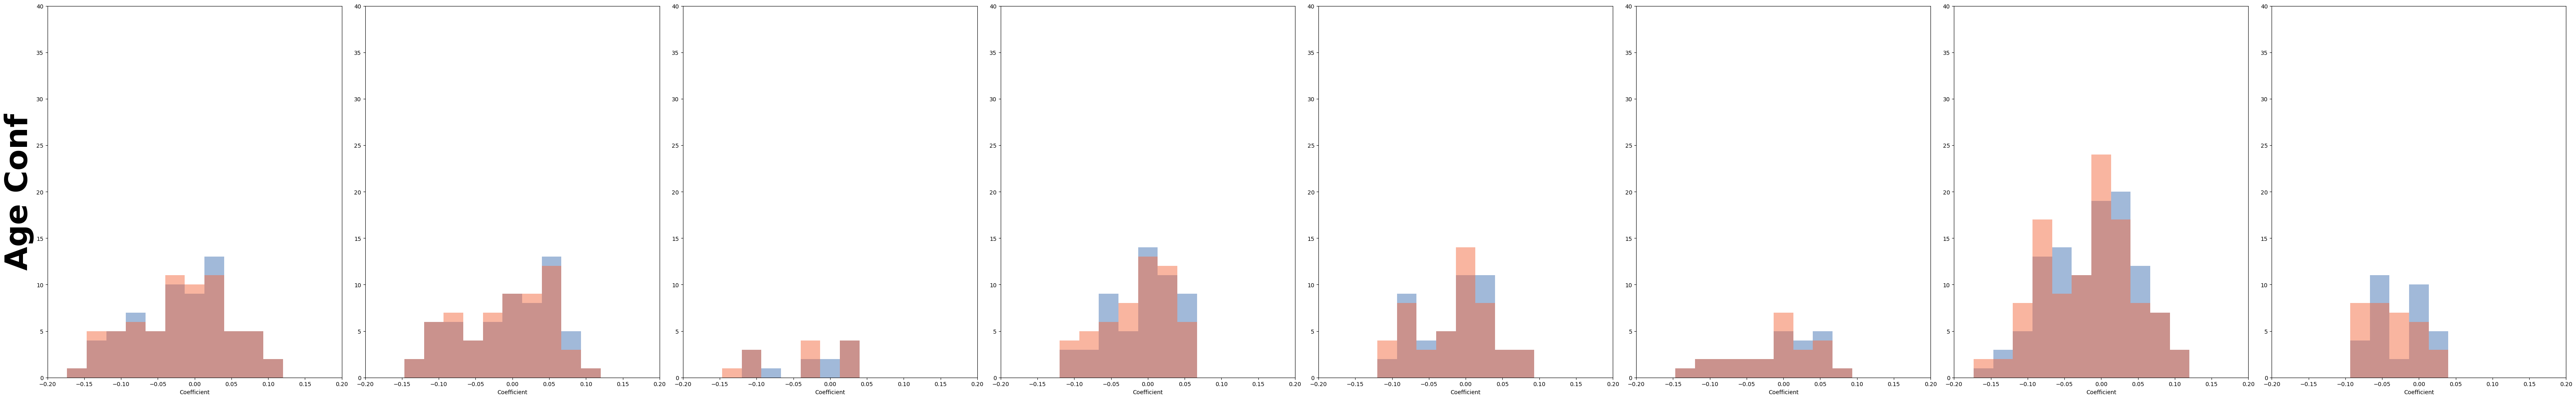

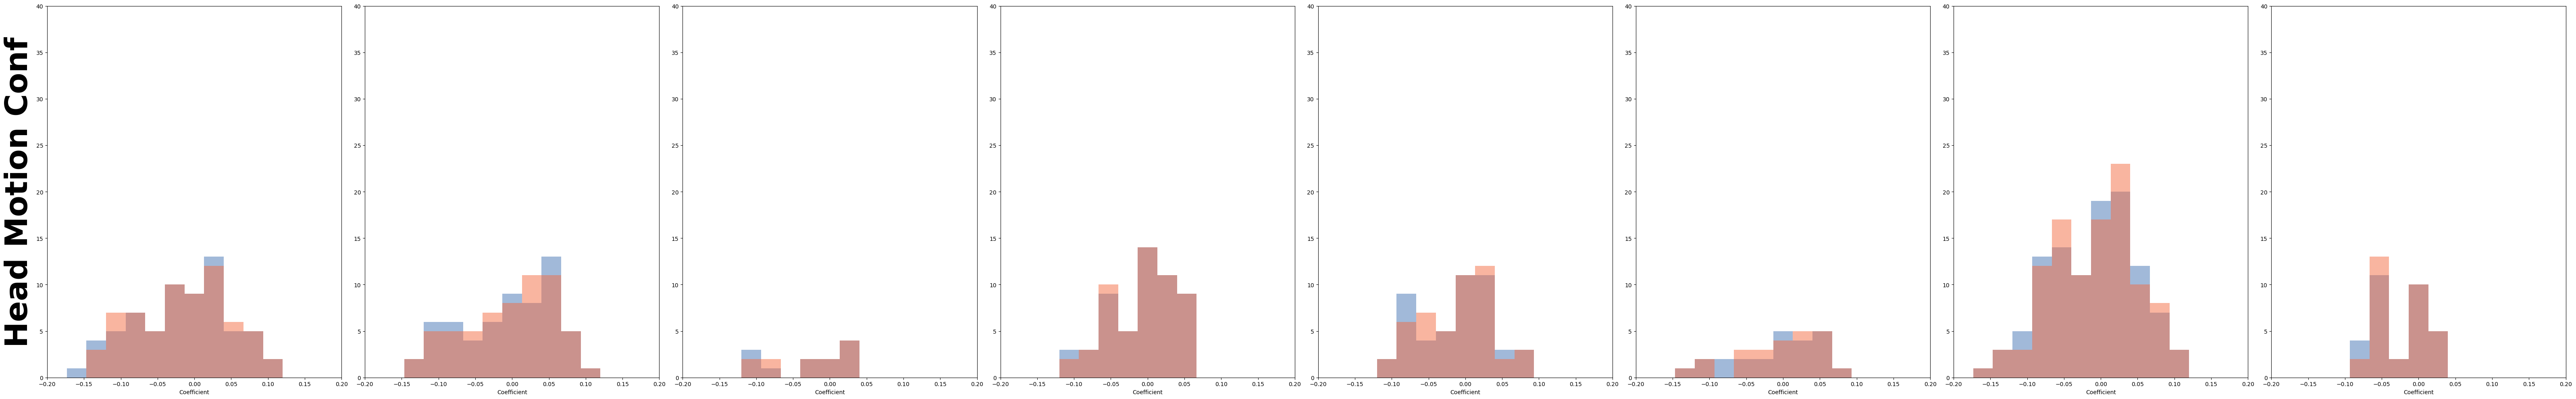

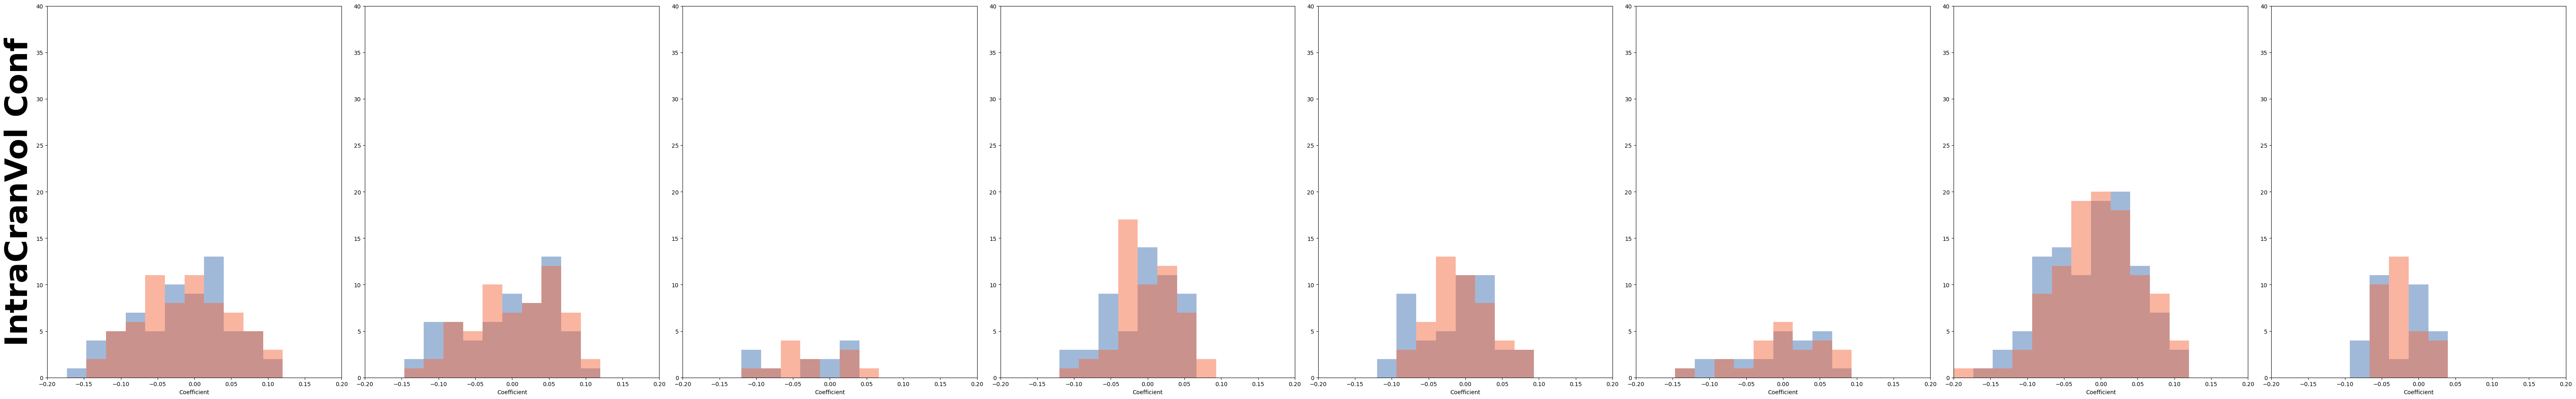

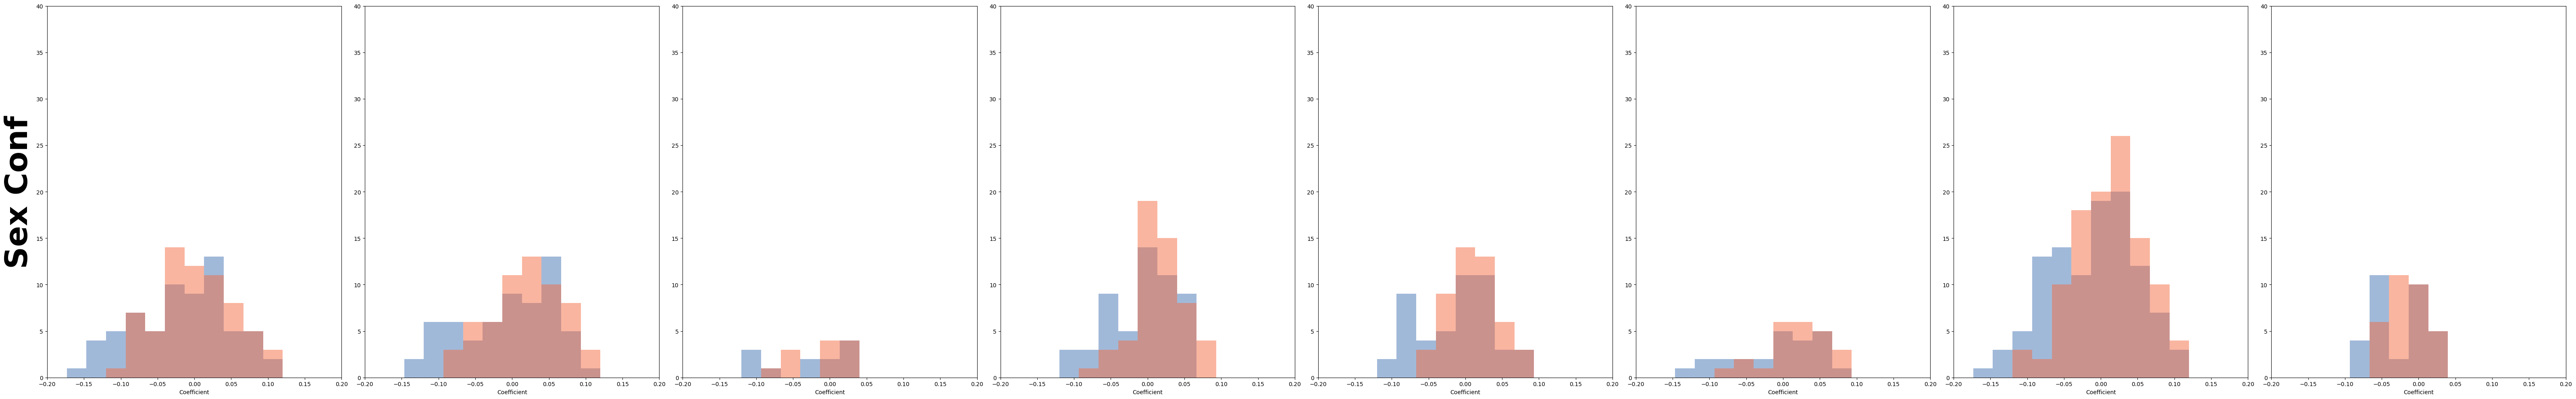

In [6]:
overlapped_hist(no_conf, "no Confounds", title=True, overlap=False, color="#4575b4")
overlapped_hist(all_conf, "All Confounds")
overlapped_hist(age_conf, "Age Conf")
overlapped_hist(hm_conf, "Head Motion Conf")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf")
overlapped_hist(sex_conf, "Sex Conf")

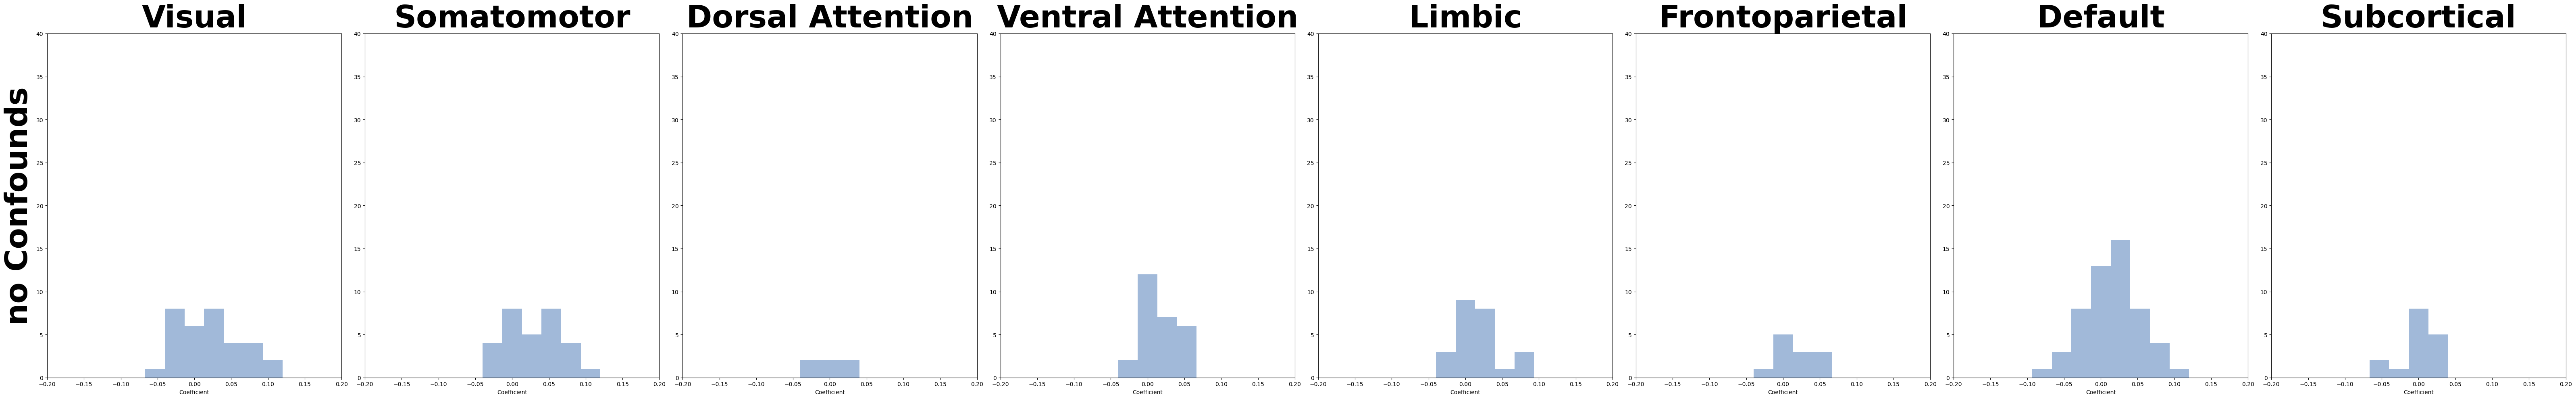

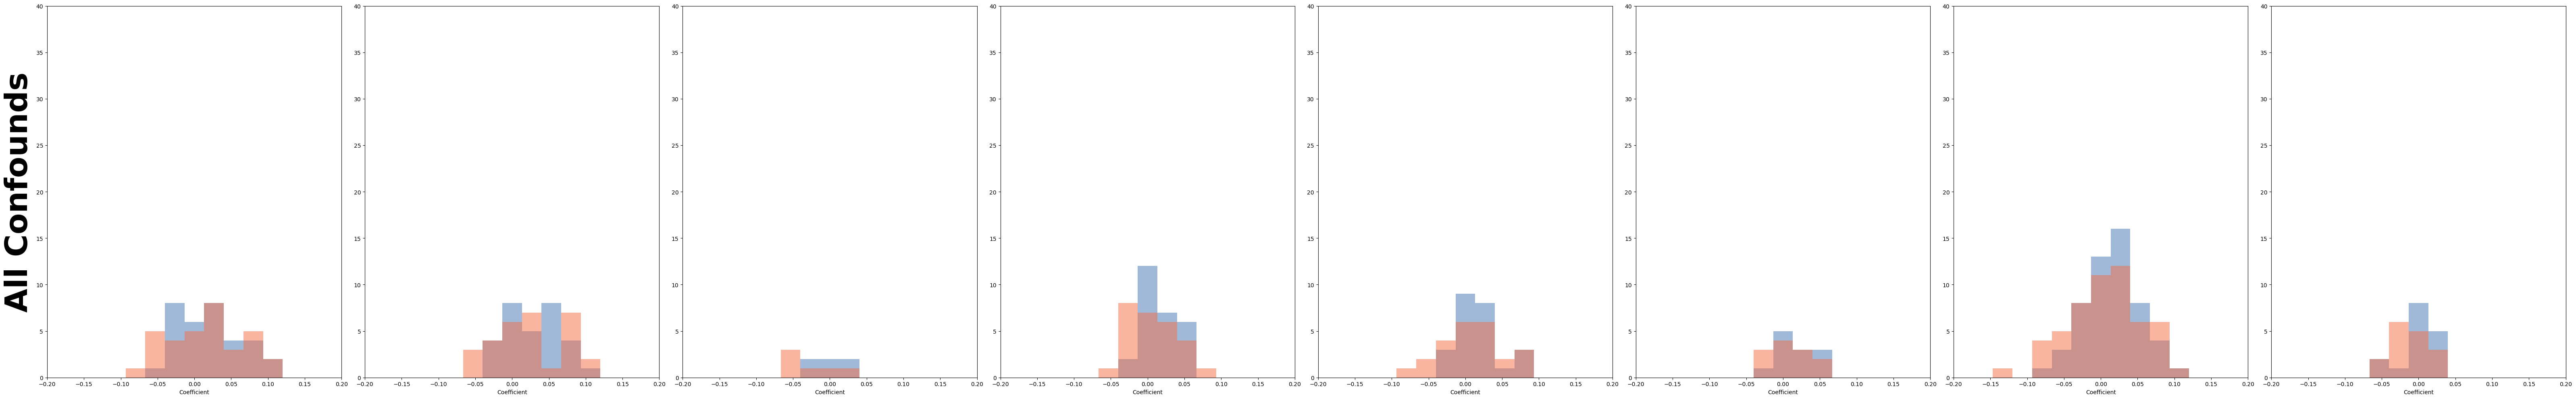

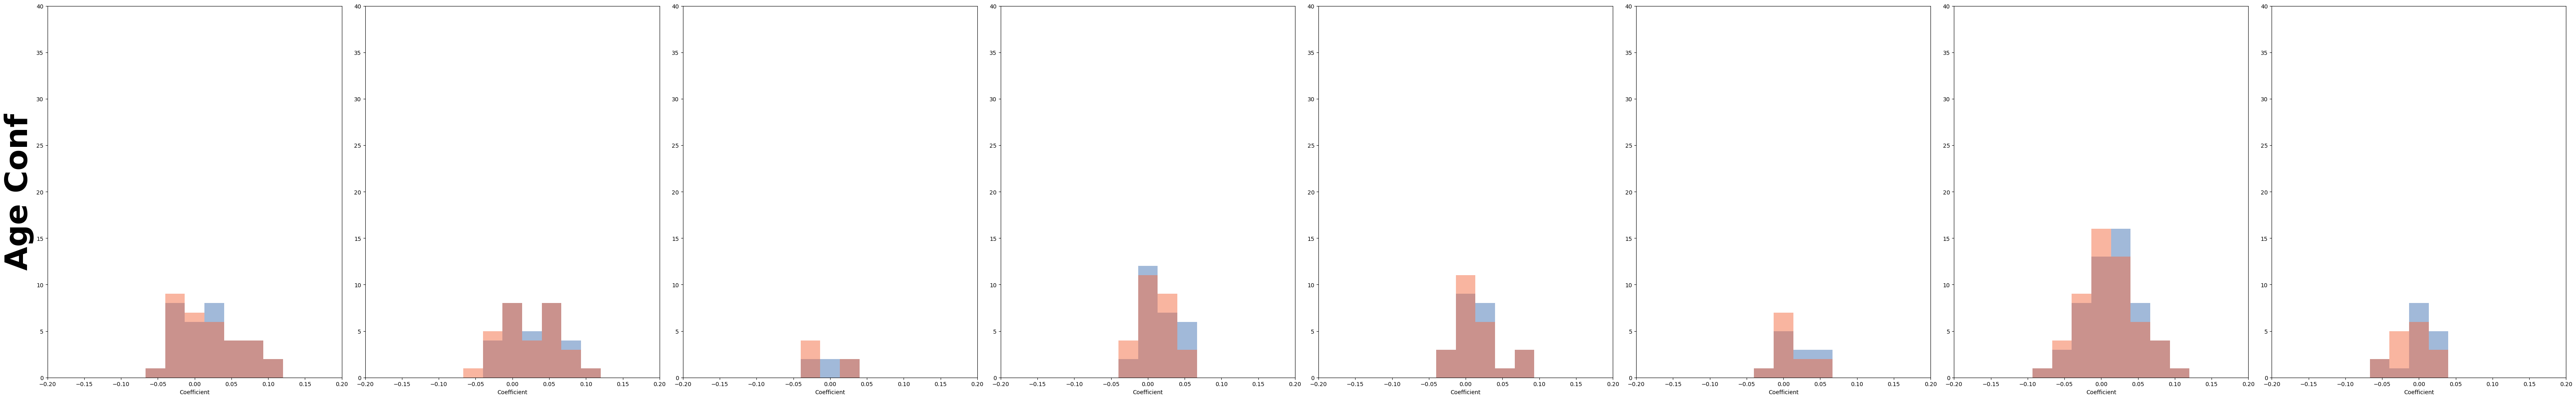

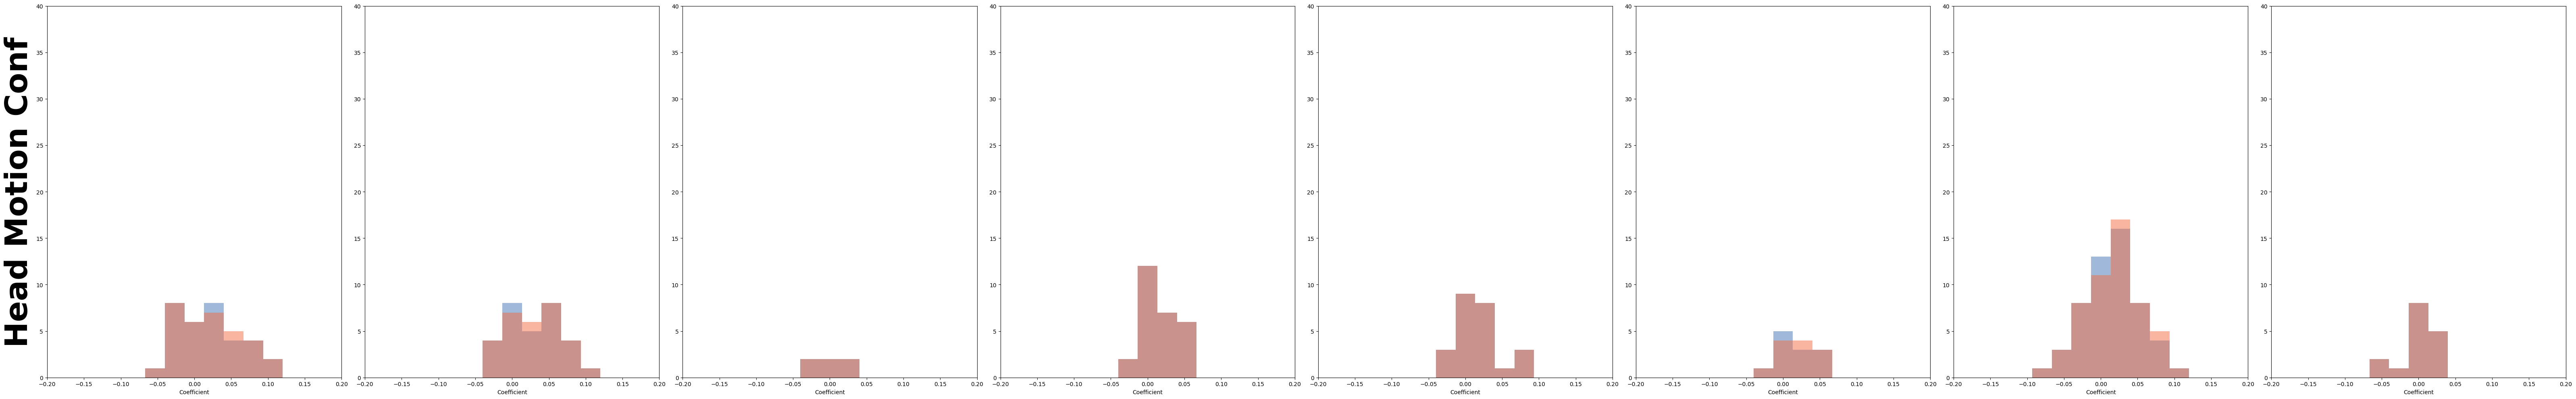

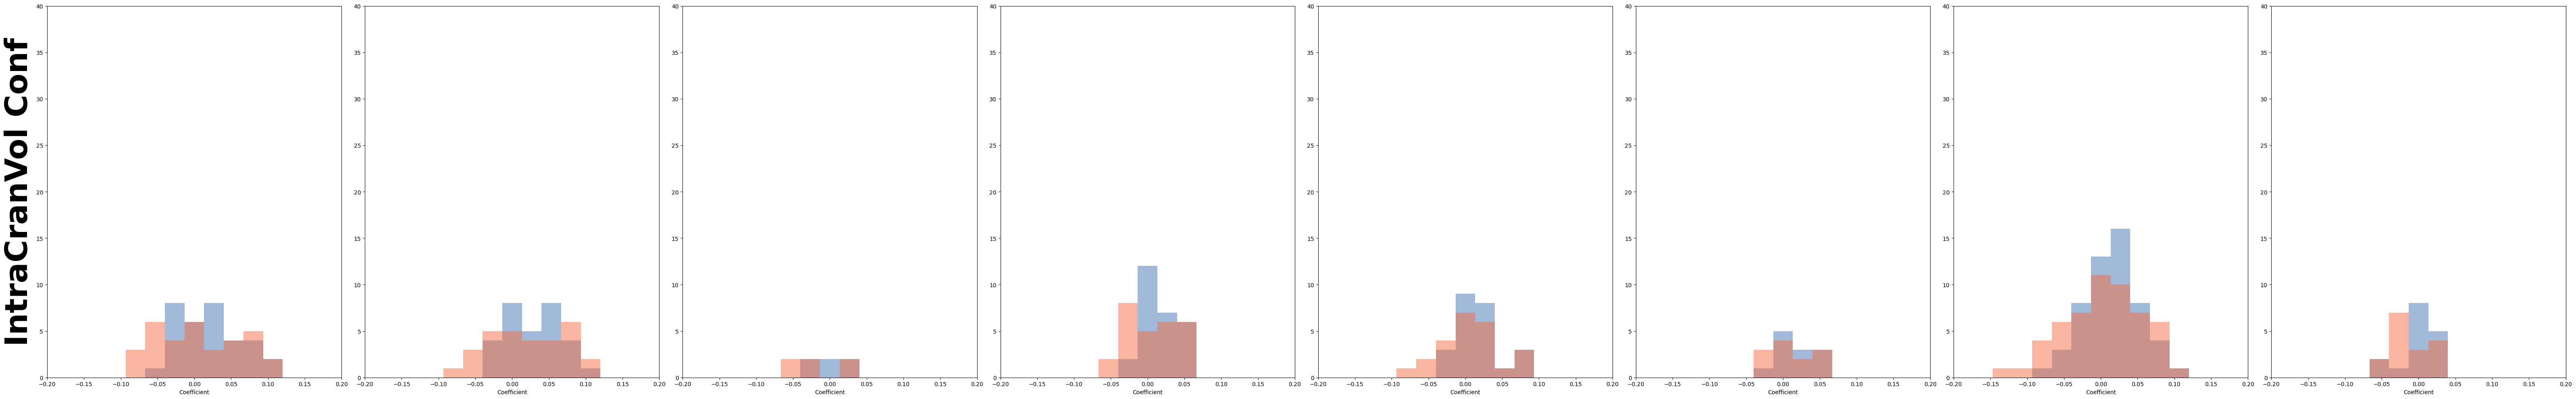

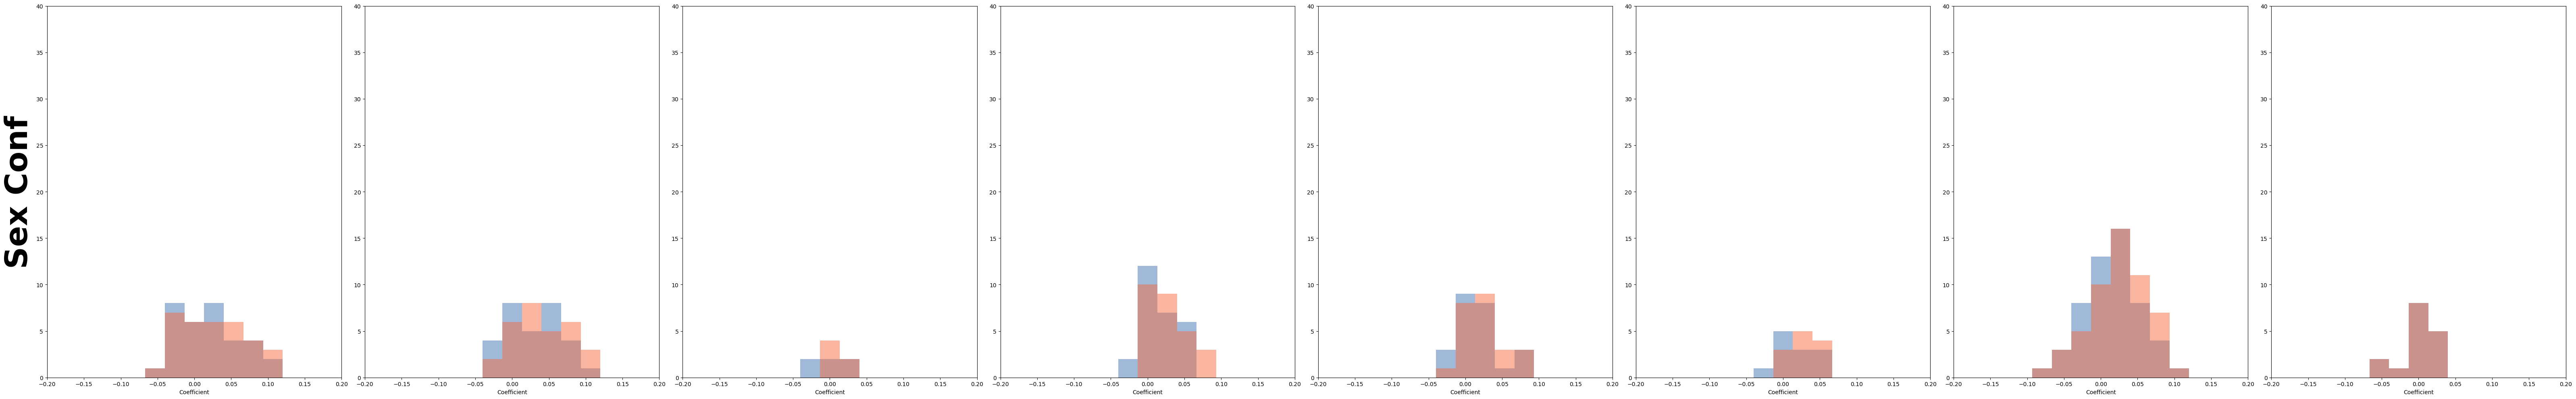

In [7]:
overlapped_hist(no_conf, "no Confounds", phenotype="Sadness", title=True, overlap=False, color="#4575b4")
overlapped_hist(all_conf, "All Confounds", phenotype="Sadness")
overlapped_hist(age_conf, "Age Conf", phenotype="Sadness")
overlapped_hist(hm_conf, "Head Motion Conf", phenotype="Sadness")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf", phenotype="Sadness")
overlapped_hist(sex_conf, "Sex Conf", phenotype="Sadness")

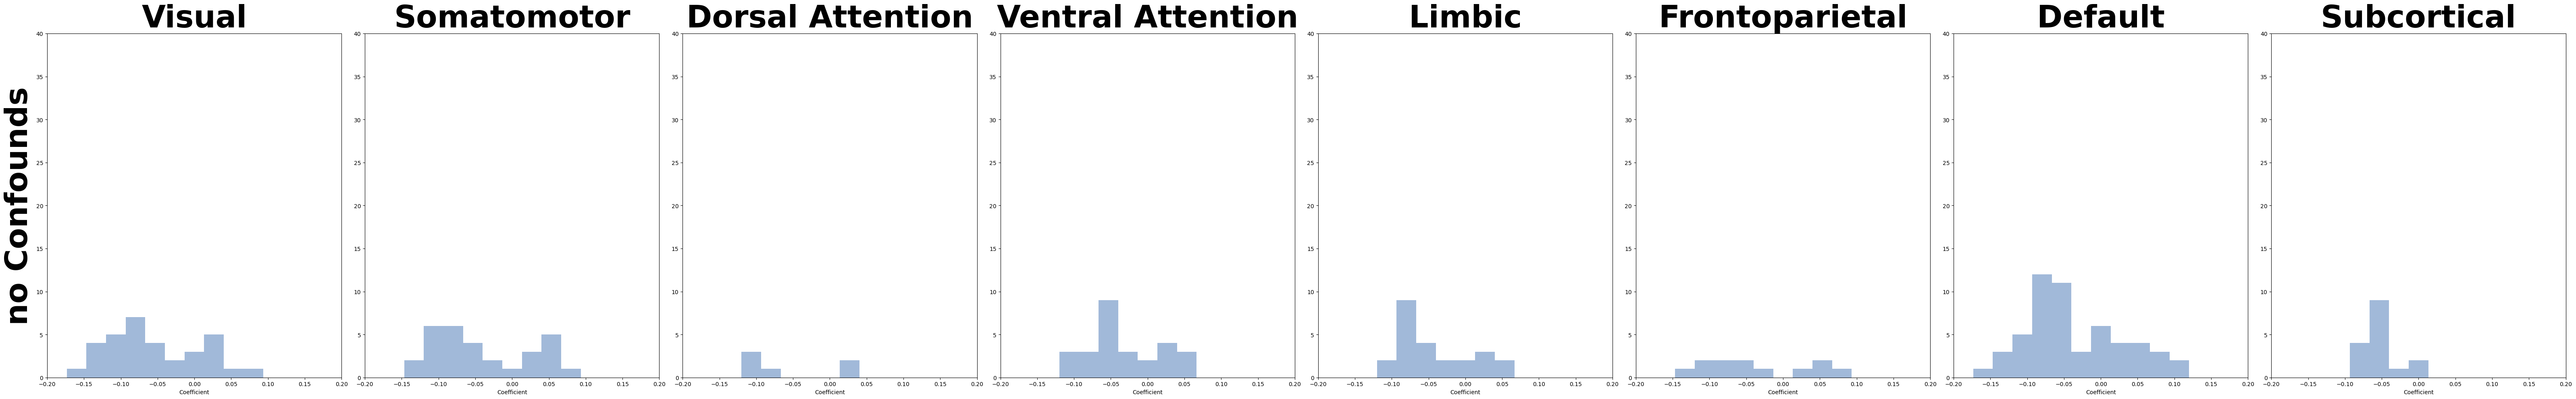

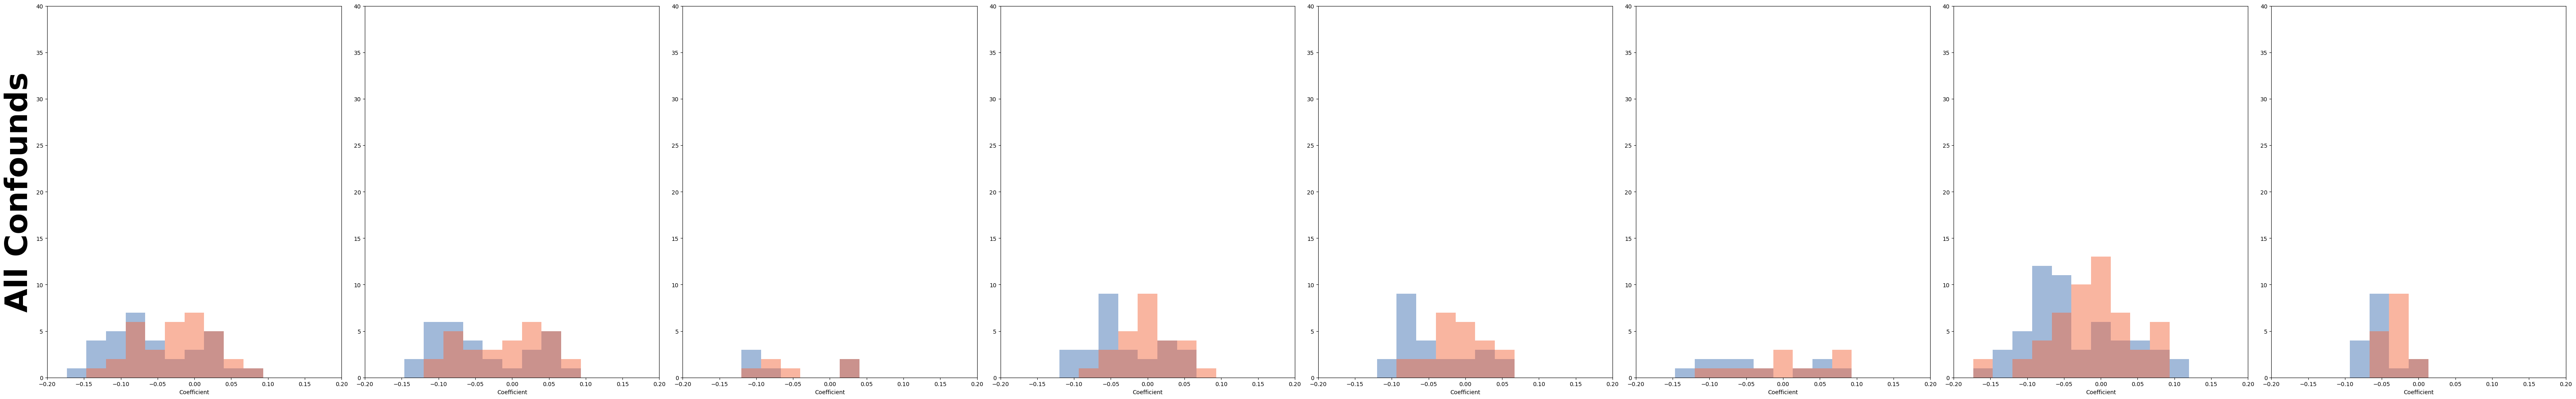

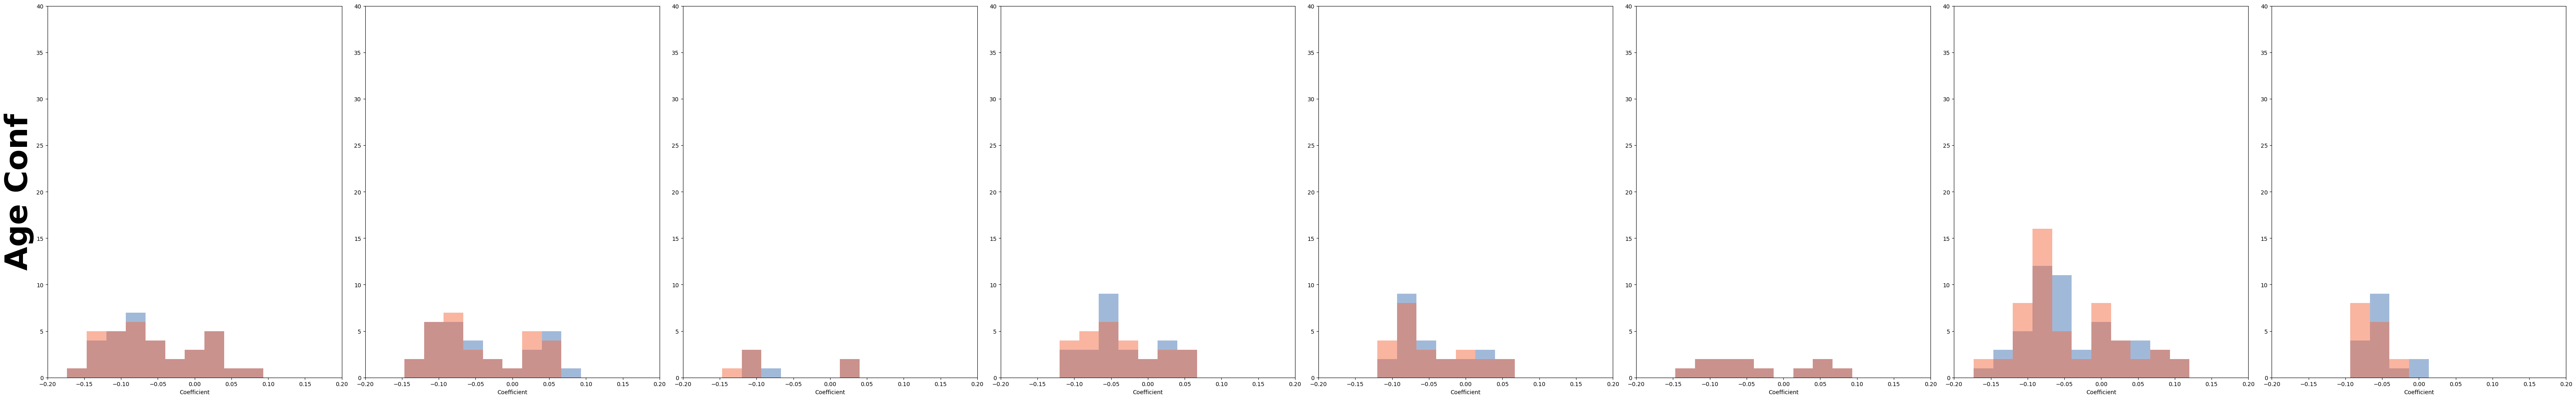

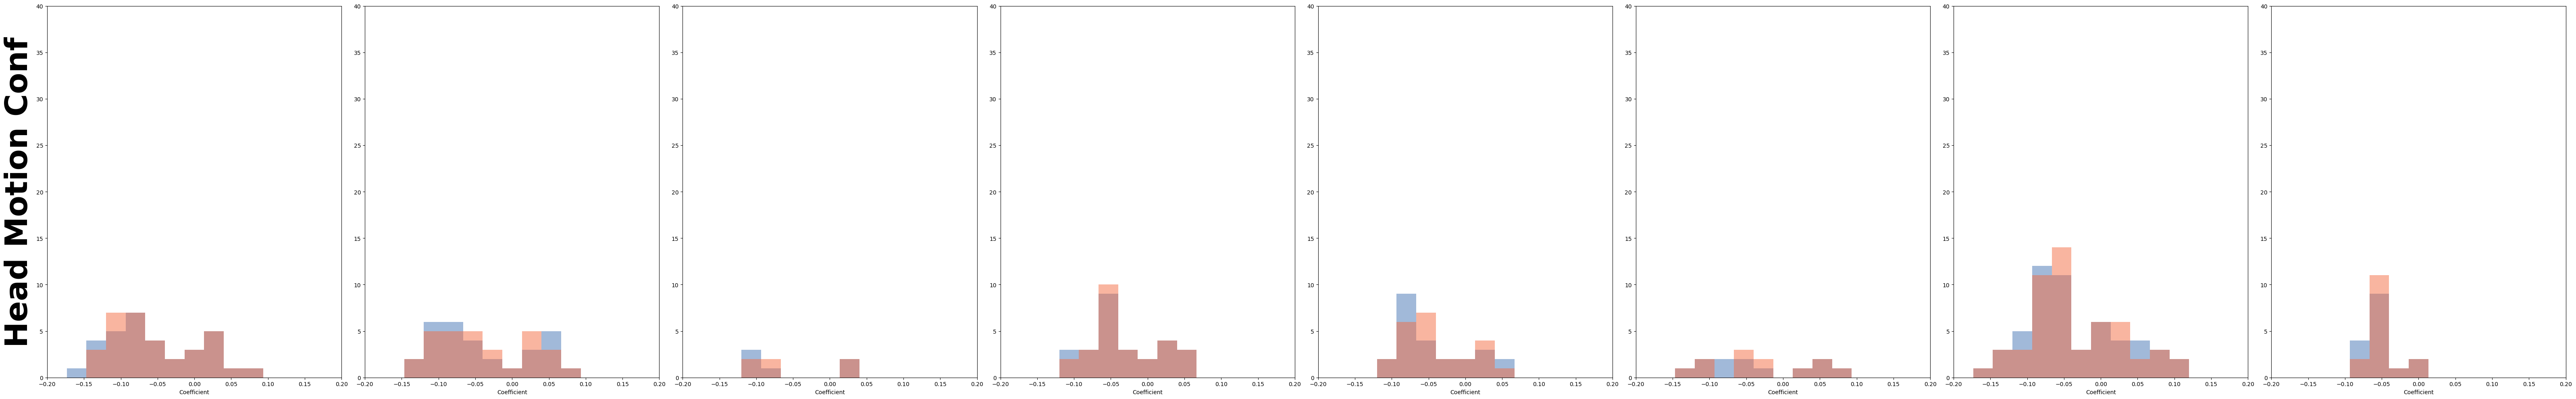

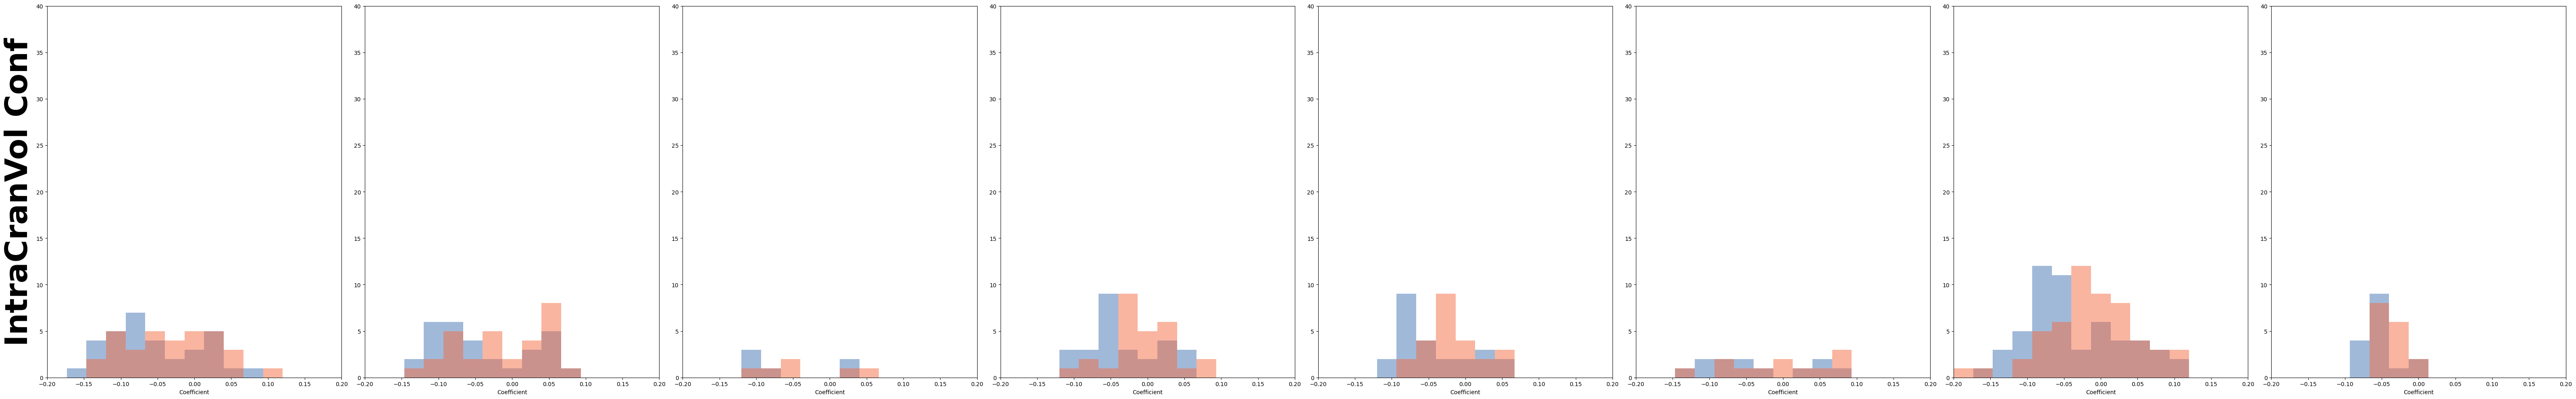

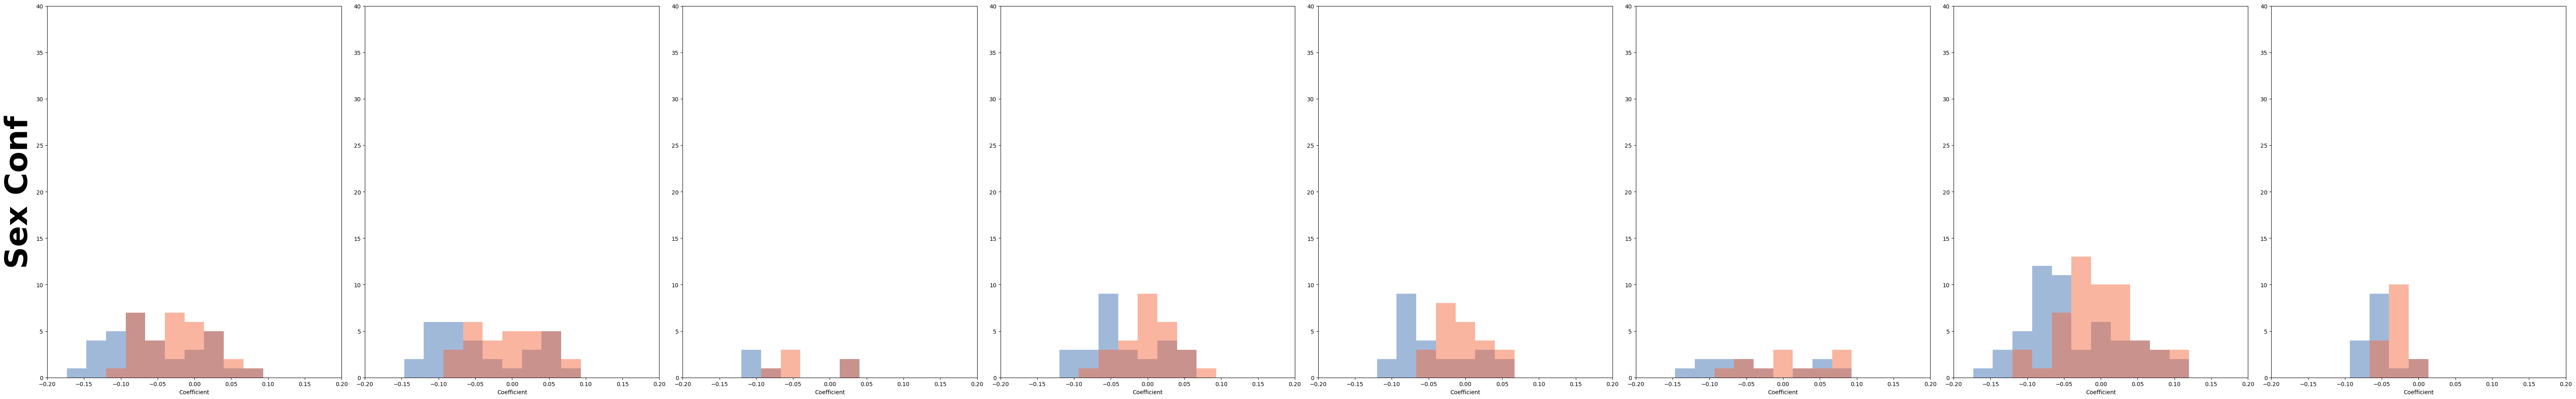

In [8]:
overlapped_hist(no_conf, "no Confounds", phenotype="Neuroticism", title=True, overlap=False, color="#4575b4")
overlapped_hist(all_conf, "All Confounds", phenotype="Neuroticism")
overlapped_hist(age_conf, "Age Conf", phenotype="Neuroticism")
overlapped_hist(hm_conf, "Head Motion Conf", phenotype="Neuroticism")
overlapped_hist(intraCranial_conf, "IntraCranVol Conf", phenotype="Neuroticism")
overlapped_hist(sex_conf, "Sex Conf", phenotype="Neuroticism")

In [97]:
def make_table(df):
    df = map_yeo(df, dictionary)
    df = df[(df['regressor'] == 'IDP (feature)')]
    groups = df["Yeo_name"].unique()

    for i, group in enumerate(groups):
        df_group_data = df[df['Yeo_name'] == group]['coef_']
        describe_stats = df_group_data.describe().loc[['mean', 'std']]
        describe_stats.name = group
        
        if i==0:
            out = pd.DataFrame(describe_stats).transpose()
        else:
            out.loc[group] = describe_stats
    return out


In [111]:
make_table(all_conf)

,mean,std
Visual,-0.006540,0.055873
Somatomotor,0.007830,0.054885
Dorsal Attention,-0.037070,0.046699
Ventral Attention,0.005873,0.035829
Limbic,0.000157,0.039050
Frontoparietal,0.002823,0.046434
Default,-0.003300,0.054729
Subcortical,-0.021549,0.022539


In [125]:
phenotypes = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/phenotypes.csv")
subj_list = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/subjects_list.csv", header=None)
confounds = pd.read_csv("/Users/fyzeen/FyzeenLocal/GitHub/FyzWAPIAW2024/data/confounds_YA.csv")

cleaned_phen = phenotypes.loc[phenotypes["Subject"].isin(subj_list[0])]
cleaned_confounds = confounds.loc[confounds["Subject"].isin(subj_list[0])]


merged = pd.merge(cleaned_phen, cleaned_confounds, on="Subject")

(array([ 23.,  40.,  59., 106., 170., 164., 147.,  62.,  73.,  56.,  24.,
         10.,   5.,   7.,   3.]),
 array([ 0.        ,  2.86666667,  5.73333333,  8.6       , 11.46666667,
        14.33333333, 17.2       , 20.06666667, 22.93333333, 25.8       ,
        28.66666667, 31.53333333, 34.4       , 37.26666667, 40.13333333,
        43.        ]),
 <BarContainer object of 15 artists>)

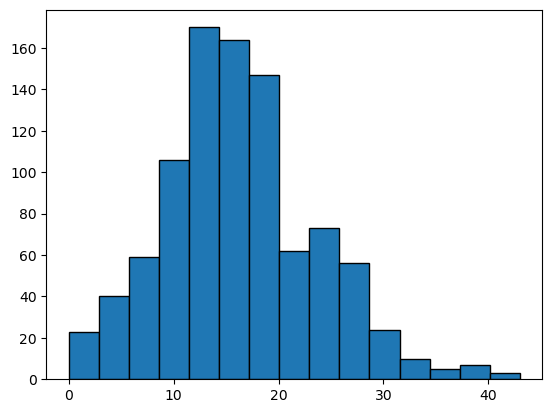

In [143]:
plt.hist(merged["Neuroticism"], bins=15, edgecolor="black")

(array([144.,  69.,  85., 137., 191., 124.,  62.,  59.,  30.,  28.,   6.,
          4.,   6.,   1.,   3.]),
 array([34.2       , 37.04666667, 39.89333333, 42.74      , 45.58666667,
        48.43333333, 51.28      , 54.12666667, 56.97333333, 59.82      ,
        62.66666667, 65.51333333, 68.36      , 71.20666667, 74.05333333,
        76.9       ]),
 <BarContainer object of 15 artists>)

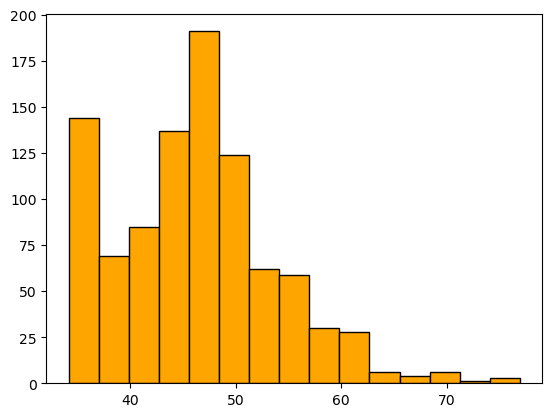

In [142]:
plt.hist(merged["Sadness"], bins=15, edgecolor="black", color="orange")

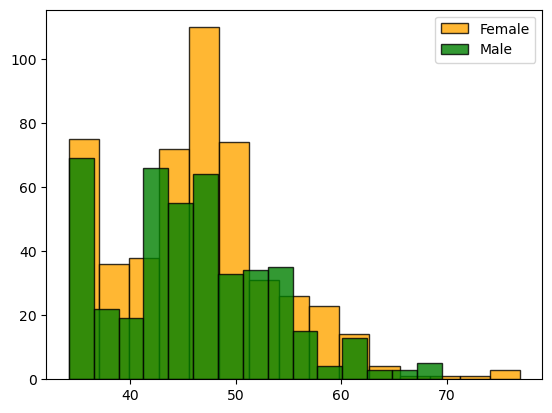

In [148]:
plt.hist(merged.loc[merged["sex"] == 0]["Sadness"], bins=15, edgecolor="black", color="orange", alpha = 0.8) # orange is female
plt.hist(merged.loc[merged["sex"] == 1]["Sadness"], bins=15, edgecolor="black", color="green", alpha=0.8) # red is male
plt.legend(["Female", "Male"])



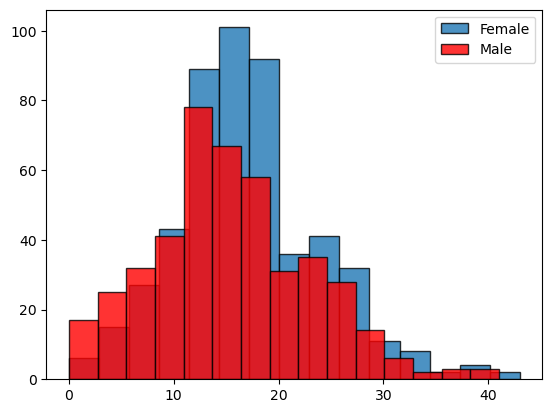

In [149]:
plt.hist(merged.loc[merged["sex"] == 0]["Neuroticism"], bins=15, edgecolor="black", alpha = 0.8) # blue is female
plt.hist(merged.loc[merged["sex"] == 1]["Neuroticism"], bins=15, edgecolor="black", color="red", alpha=0.8) # red is male
plt.legend(["Female", "Male"])
